# Morning Lecture

# Feature Engineering

**Feature Engineering** == Cleaning / Pre-processing your columns!

In [1]:
import pandas as pd
df=pd.read_csv("train.csv")

In [2]:
X=df[['Pclass','Sex','Embarked','Age']]
# matrix

In [3]:
y=df['Survived']
# vector
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42) # 75% to 25% splitting the data

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 4), (223, 4), (668,), (223,))

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
m=LogisticRegression()

# Now we need Feature Engineering!

In [9]:
X_train.dtypes

Pclass        int64
Sex          object
Embarked     object
Age         float64
dtype: object

In [10]:
X_train.isna().sum()

Pclass        0
Sex           0
Embarked      2
Age         132
dtype: int64

In [11]:
# 1. Missing Values (Imputation)

In [12]:
X_train['Embarked'].mode()

0    S
dtype: object

In [13]:
#pd.options.mode.chained_assignment=True # it stops giving warning (CHECK IT)
#X_train.dropna(subset=['Embarked'] , inplace=True) # Wrong version
X_train['Embarked'].fillna(X_train['Embarked'].mode() , inplace=True)
# It drops all the rows in the dataset with NaN values in 'Embarked' column.
# If we don't add inside the paranthesis part, it deletes all the rows in the
# dataset with NaN values in 'ANY' column !
# "inplace=True" makes the changes permanently !!!

X_train['Age'].fillna(value=X_train['Age'].median(), inplace=True)
# you can also use in some other cases: .fillna(method='ffill') as forward(f) or back(b) fill
# another way is "interpolation" .interpolate(method='linear')

/home/spiced/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
X_train.isna().sum() # also check for .isnull()

Pclass      0
Sex         0
Embarked    2
Age         0
dtype: int64

In [15]:
pd.factorize(X_train['Sex'], sort=True) # be careful with this function!! it is better not to use with more than 3
# elements lists. '.sort=True' is optional.
X_train['Sex_Number']=pd.factorize(X_train['Sex'], sort=True)[0] 
#replacing the 'sex' column with the processed new one
X_train.head()

/home/spiced/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex,Embarked,Age,Sex_Number
298,1,male,S,28.00,1
884,3,male,S,25.00,1
247,2,female,S,24.00,0
478,3,male,S,22.00,1
305,1,male,S,0.92,1


In [16]:
# another method: "one-hot-encoding" (binary boolean)
embarked_cols=pd.get_dummies(X_train['Embarked'])

In [17]:
X_train_merged=pd.merge(left=X_train, right=embarked_cols, how='inner', on=X_train.index).set_index('key_0')
# set.index('key_0') is added after running the line. it was creating an extra column before that!!
X_train_merged.head()

,Pclass,Sex,Embarked,Age,Sex_Number,C,Q,S
key_0,,,,,,,,
298,1,male,S,28.00,1,0,0,1
884,3,male,S,25.00,1,0,0,1
247,2,female,S,24.00,0,0,0,1
478,3,male,S,22.00,1,0,0,1
305,1,male,S,0.92,1,0,0,1


In [18]:
X_train_final=X_train_merged.drop(['Sex','Embarked', 'S'],axis=1) 
# axis=1 means: by the way, those variables are columns!

In [19]:
X_train_final.head()

,Pclass,Age,Sex_Number,C,Q
key_0,,,,,
298,1,28.00,1,0,0
884,3,25.00,1,0,0
247,2,24.00,0,0,0
478,3,22.00,1,0,0
305,1,0.92,1,0,0


In [20]:
m.fit(X_train_final, y_train)

/home/spiced/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
m.score(X_train_final, y_train) # also check for the "statsmodels" library

0.7964071856287425

In [22]:
m.coef_

array([[-0.84869752, -0.01813126, -2.34228847,  0.61997377,  0.31885095]])

In [23]:
X_train_final.columns

Index(['Pclass', 'Age', 'Sex_Number', 'C', 'Q'], dtype='object')

In [24]:
#m.score(X_test, y_test)

# Wrap all feature-engineering changes into a single function

In [31]:
def feature_engineering(df):
    #1.
    df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)
    df['Age'].fillna(value=df['Age'].median(), inplace=True)
    df['Sex_Number']=pd.factorize(df['Sex'],sort=True)[0]
    embarked_cols=pd.get_dummies(df['Embarked'])
    df=pd.merge(left=df,right=embarked_cols,how='inner', on=df.index).set_index('key_0')
    df=df.drop(['Sex','Embarked','S'], axis=1)
    return df

In [32]:
X_test_final=feature_engineering(X_test)
m.score(X_test_final,y_test)

/home/spiced/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0.7847533632286996

In [33]:
### What have we learned?
# 1. We should try to split our dataset into training and testing sub-samples as early as we can.
#    - but, this is flexible -- e.g. you can dropna's from the entire dataset before filling.
# 2. We need to feature engineer our testing data in the same way that we feature-engineered our traininf data.
#    - otherwsie our model will be confused (i.e. error)
#    - writing a function is a nice way to do this. 
# 3. Feature Engineering includes any pre-processing techniques, such as;
#    - imputation, dropping missing values
#    - converting strings / non-numeric values into numeric values
#    - other things: binning, scaling, combining features
# 4. Ideally, your testing score is about the same as your training score
#    - this means yourmodel has generalized well and learned useful insignts from
#      the data without overfitting!!
#    - overfitting is when training score >>> testing score

# Playing with dataset

In [4]:
# option 1
import pandas as pd
df=pd.read_csv('train.csv')
list_of_titles=[]
for i in df['Name']:
    title=i.split()[1]
    if title.strip().endswith('.'):
        list_of_titles.append(title)
        
titles=dict(enumerate(set(list_of_titles)))
titles

{0: 'Rev.',
 1: 'Don.',
 2: 'Mme.',
 3: 'Mlle.',
 4: 'Capt.',
 5: 'Jonkheer.',
 6: 'Miss.',
 7: 'Master.',
 8: 'Mrs.',
 9: 'Major.',
 10: 'Mr.',
 11: 'Dr.',
 12: 'Ms.',
 13: 'Col.'}

In [5]:
# option 2
import re

def extract(s):
  """
  Look for a substring in my string that starts with a blank space
  then followed alpha-numeric character (case-insensitive)
  --- as many times as you can find --- until you reach a period.
  """
  pattern = r"\ \w*\."
    
  match = re.search(pattern, s)
  return match.group().strip()

df["Name_Title"] = df["Name"].apply(extract)

In [ ]:
# option 3

In [9]:
df['Name_Title2'] = df['Name'].str.extract(r'\b(\w*\w*)\b\.')
df['Name_Title2'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name_Title2, dtype: object

In [10]:
# Option 4

In [13]:
df['Name_Title3'] = df['Name'].str.extract('([A-Z]\w{0,}\.)', expand=True)
df['Name_Title3'].head()

0      Mr.
1     Mrs.
2    Miss.
3     Mrs.
4      Mr.
Name: Name_Title3, dtype: object

## Afternoon Lecture

In [28]:
from sklearn.datasets import load_breast_cancer

In [32]:
bunch=load_breast_cancer()
type(bunch)

sklearn.utils.Bunch

In [33]:
# Bunches are dictionaries - more or less
bunch.items()
bunch.keys() #collection of the things in the bunch dataset

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [35]:
print(bunch['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [36]:
X=bunch['data']
y=bunch['target']

In [37]:
df=pd.DataFrame(X, columns=bunch['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [40]:
m=LogisticRegression()
X_train, X_test, y_train, y_test=train_test_split(X,y)

In [41]:
m.fit(X_train,y_train)

/home/spiced/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
ypred=m.predict(X_test)
ytrainpred=m.predict(X_train)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,ypred)

0.951048951048951

In [53]:
accuracy_score(y_train,ytrainpred)

0.9530516431924883

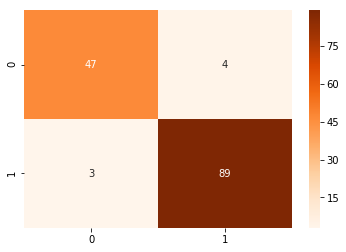

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf=confusion_matrix(y_test,ypred)
sns.heatmap(conf,cmap='Oranges', annot=True)

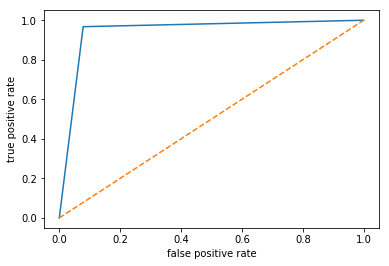

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plt
fpr,tpr,_=roc_curve(y_test,ypred)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot([0,1],[0,1],linestyle='--')